#### Описание проекта: <br> 
Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. <br> Задача — разобраться в причинах и помочь компании выйти в плюс. <br> 
#### Описание данных: <br> 
Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу. <br>
<br>
Структура visits_info_short.csv: <br>
<br>
User Id — уникальный идентификатор пользователя, <br>
Region — страна пользователя,<br>
Device — тип устройства пользователя,<br>
Channel — идентификатор источника перехода,<br>
Session Start — дата и время начала сессии,<br>
Session End — дата и время окончания сессии.<br>
<br>
Структура orders_info_short.csv:<br>
User Id — уникальный идентификатор пользователя,<br>
Event Dt — дата и время покупки,<br>
Revenue — сумма заказа.<br>
<br>
Структура costs_info_short.csv:<br>
dt — дата проведения рекламной кампании,<br>
Channel — идентификатор рекламного источника,<br>
costs — расходы на эту кампанию.<br>
<br>
#### План работы: <br> 
1. Подготовить данные к анализу <br>
2. Задать функции для расчёта и анализа LTV, ROI, удержания и конверсии.<br>
3. Провести исследовательский анализ данных <br>
4. Маркетинг<br>
5. Оценить окупаемость рекламы
</div>

In [112]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [113]:
pd.set_option('display.max_columns', 50) 
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# параметры для корректного отображения таблиц и более удобного их анализа

In [117]:
def info(df): #функция для отображения основных таблиц для ознакомления с данными
    display(df.head())
    display(df.info())
    display(df.isna().sum())

In [118]:
info(visits)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

Колонки с датой в формате object --> надо перевести в Datetime

In [119]:
info(orders)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52  4.99000
1  174361394180  2019-05-01 12:24:04  4.99000
2  529610067795  2019-05-01 11:34:04  4.99000
3  319939546352  2019-05-01 15:34:40  4.99000
4  366000285810  2019-05-01 13:59:51  4.99000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [120]:
orders['Revenue'].unique() #удостовериться, что в колонке Revenue разные значения

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

Колонка с датой также не в подходящем формате

In [121]:
info(costs)

dt   Channel     costs
0  2019-05-01  FaceBoom 113.30000
1  2019-05-02  FaceBoom  78.10000
2  2019-05-03  FaceBoom  85.80000
3  2019-05-04  FaceBoom 136.40000
4  2019-05-05  FaceBoom 122.10000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

dt         0
Channel    0
costs      0
dtype: int64

Как и в предыдущих, колонка с датой не в нужном формате

Во всех датасетах названия лучше привести к snake_case для удобства

In [122]:
visits.columns= visits.columns.str.lower()
visits = visits.rename(columns={'user id': 'user_id', 'session start' : 'session_start', 'session end' : 'session_end' })
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply (pd.to_datetime)

orders.columns= orders.columns.str.lower()
orders = orders.rename(columns={'user id': 'user_id', 'event dt' : 'event_dt'})
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

costs.columns= costs.columns.str.lower()
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

* Привели названия колонок к нижнему регистру
* Привели названия колонок к snake_case
* Заменили тип значений в столбцах с датой на datetime
* Пропусков нет, также как и скрытых дубликатов

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [124]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [125]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [126]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [127]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

In [128]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [129]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [130]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [131]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Составим профили пользователей

In [132]:
profiles = get_profiles(visits, orders, costs) #профили пользователей
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True           1.08817  
1  2019-07-09 2019-07-01  False           1.10724  
2  2019-10-01 2019-10-01  False           0.00000  
3  2019-08-22 2019-08-01  False           0.98824  
4  2019-10-02 2019-10-01  False           0.23077

In [133]:
profiles['dt'].min(), profiles['dt'].max() # минимлаьная и максимальная даты привлечения пользователей

(datetime.date(2019, 5, 1), datetime.date(2019, 10, 27))

Подготовили полную таблицу с профилями пользователей для последующего анализа

#### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [134]:
a = (
    profiles.groupby('region')
    .agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)
a

user_id   payer
region                        
United States   100002 0.06902
Germany          14981 0.04112
UK               17575 0.03983
France           17450 0.03799

Text(0.5, 1.0, 'Количество пользователей и доля платящих из каждой страны')

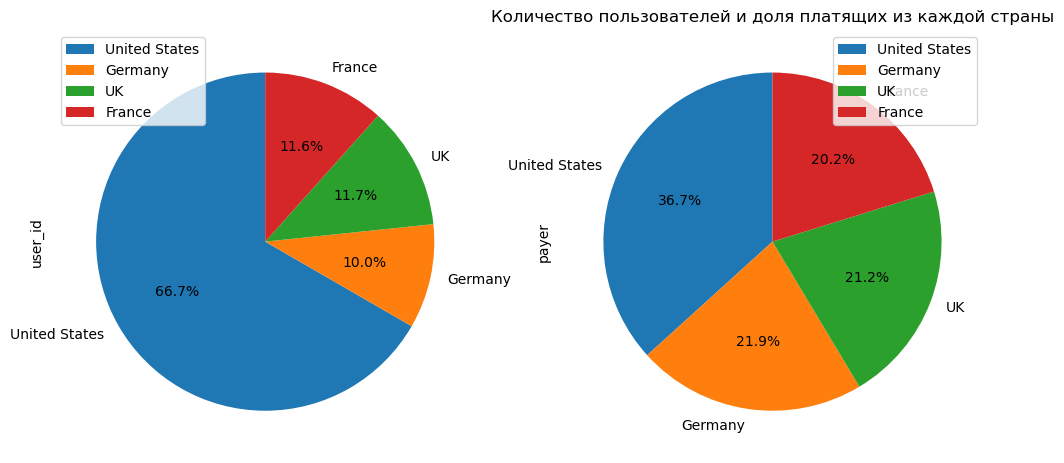

In [135]:
a.plot(kind='pie', subplots=True, figsize= (12,8), normalize=True,  startangle=90, autopct='%1.1f%%');
plt.title('Количество пользователей и доля платящих из каждой страны')

Больше всего пользователей из USA. Остальные 3 страны выборки делятся примерно поровну. Такая же ситуация и для доли платящих: в США пользователи больше расположены к покупкам внутри приложения, тогда как страны европы имеют примерно равные показатели, которые несколько ниже, чем в США.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [136]:
b = (
    profiles.groupby('device')
    .agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)
b

user_id   payer
device                  
Mac        30042 0.06364
iPhone     54479 0.06208
Android    35032 0.05852
PC         30455 0.05047

Text(0.5, 1.0, 'Количество пользователей и доля платящих для каждого устройства')

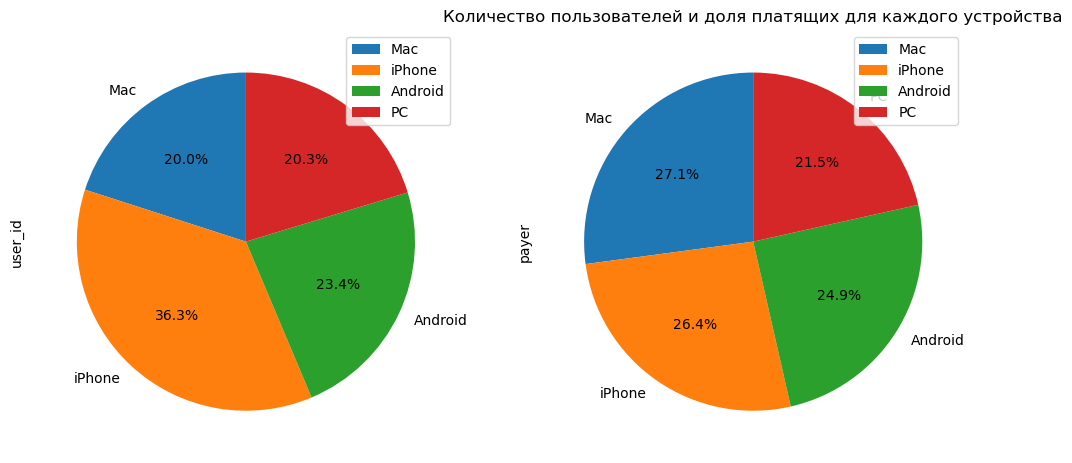

In [137]:
b.plot(kind='pie', subplots=True, figsize= (12,8), normalize=True, startangle=90, autopct='%1.1f%%');
plt.title('Количество пользователей и доля платящих для каждого устройства')

Больше всего пользователей были зарегестрированы с iPhone, когда три остальные платформы имеют примерно равные значения. Немного выбивается Android, что стоит отметить, поскольку это показывает большую аудиторию с мобильных устройств. <br>
На долю платящих платформа не влияет никак. Цифры абсолютно одинаковые 

#### Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [138]:
c = (
    profiles.groupby('channel')
    .agg({'user_id': 'count', 'payer': 'mean'})
    .sort_values(by='payer', ascending=False)
)
c

user_id   payer
channel                            
FaceBoom              29144 0.12205
AdNonSense             3880 0.11340
lambdaMediaAds         2149 0.10470
TipTop                19561 0.09601
RocketSuperAds         4448 0.07914
WahooNetBanner         8553 0.05296
YRabbit                4312 0.03827
MediaTornado           4364 0.03575
LeapBob                8553 0.03063
OppleCreativeMedia     8605 0.02708
organic               56439 0.02055

Text(0.5, 1.0, 'Количество пользователей и доля платящих для каждого канала привлечения')

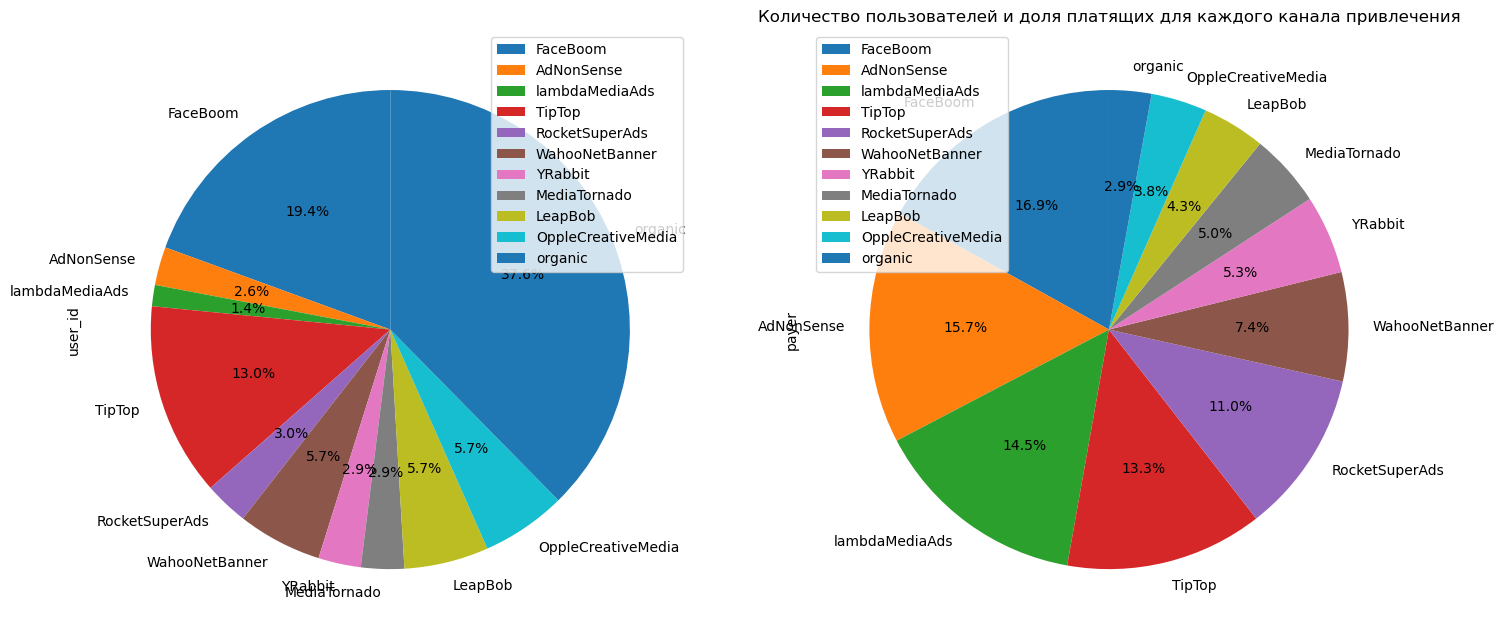

In [139]:
c.plot(kind='pie', subplots=True, figsize= (17,12), normalize=True, startangle=90, autopct='%1.1f%%');
plt.title('Количество пользователей и доля платящих для каждого канала привлечения')

Больше всего пользователей пришло сами -- 56.5 тысяч человек. Остальные каналы привлечения выделяют FaceBoom как канал с самым большим притоком пользователей(29 тыс), за ним следом TipTop(19 тыс). Остальные каналы привлечения делятся на 2 группы с количеством привлеченных пользователей около 8 тыс. человек, и с количеством 4 тысячи и меньше. <br>
По доле платящих на первом месте, как и пот количеству пользователей(не считая органик) выступает FaceBoom, на втором и третьем месте два канала с самыми малыми показателями пользователей. Канал, который был на втором месте по количеству привлеченных пользователей, TipTop, только на 4ом месте по доле платящих. 

## Маркетинг

#### Посчитаем общую сумму расходов на маркетинг.  Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [140]:
costs['costs'].sum()

105497.30000000002

In [141]:
costs.pivot_table(
    index='channel',
    values='costs',
    aggfunc='sum').sort_values(by='costs', ascending=False)

costs
channel                       
TipTop             54751.30000
FaceBoom           32445.60000
WahooNetBanner      5151.00000
AdNonSense          3911.25000
OppleCreativeMedia  2151.25000
RocketSuperAds      1833.00000
LeapBob             1797.60000
lambdaMediaAds      1557.60000
MediaTornado         954.48000
YRabbit              944.22000

На канал привлечения TipTop было потрачено около половины всех расходов на маркетинг -- 55 тысяч у.е. На втором месте по затратам стоит FaceBoom с 32445 тысячами у.е. На остальные источники было потрачено максимум 5 тысяч у.е.(на третий по затратам канал WahooNetBanner) и ниже.

dt         channel    costs  week  month
1799  2019-10-27  lambdaMediaAds 12.00000    43     10
536   2019-10-24  RocketSuperAds  5.85000    43     10
1257  2019-10-25         LeapBob 14.70000    43     10
1256  2019-10-24         LeapBob 12.81000    43     10
356   2019-10-24    MediaTornado  5.04000    43     10
...          ...             ...      ...   ...    ...
720   2019-05-01         YRabbit  8.10000    17      5
540   2019-05-01          TipTop 80.00000    17      5
360   2019-05-01  RocketSuperAds 21.06000    17      5
180   2019-05-01    MediaTornado  6.24000    17      5
900   2019-05-01      AdNonSense 40.95000    17      5

[1800 rows x 5 columns]

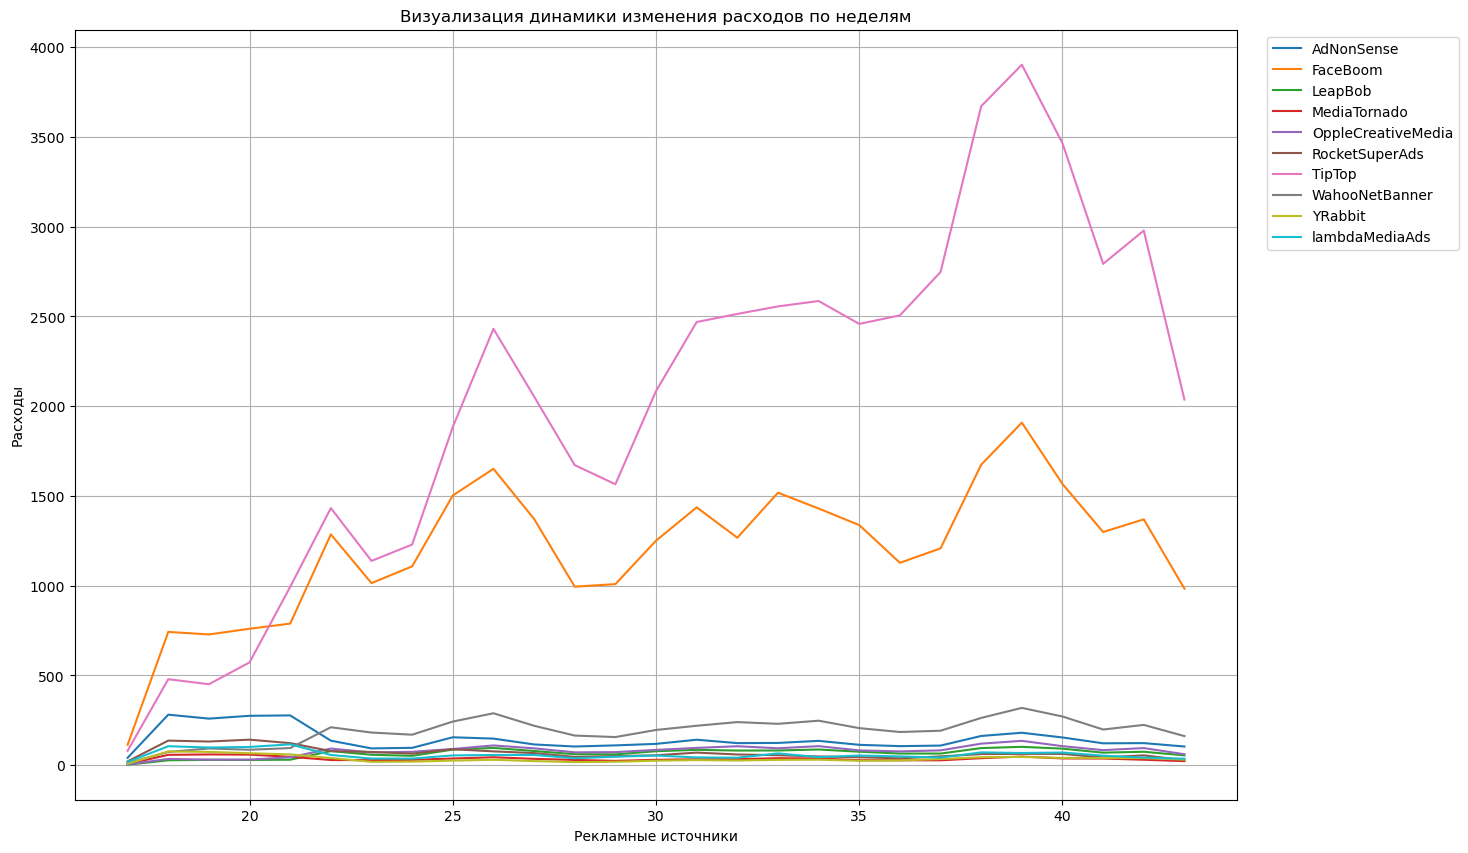

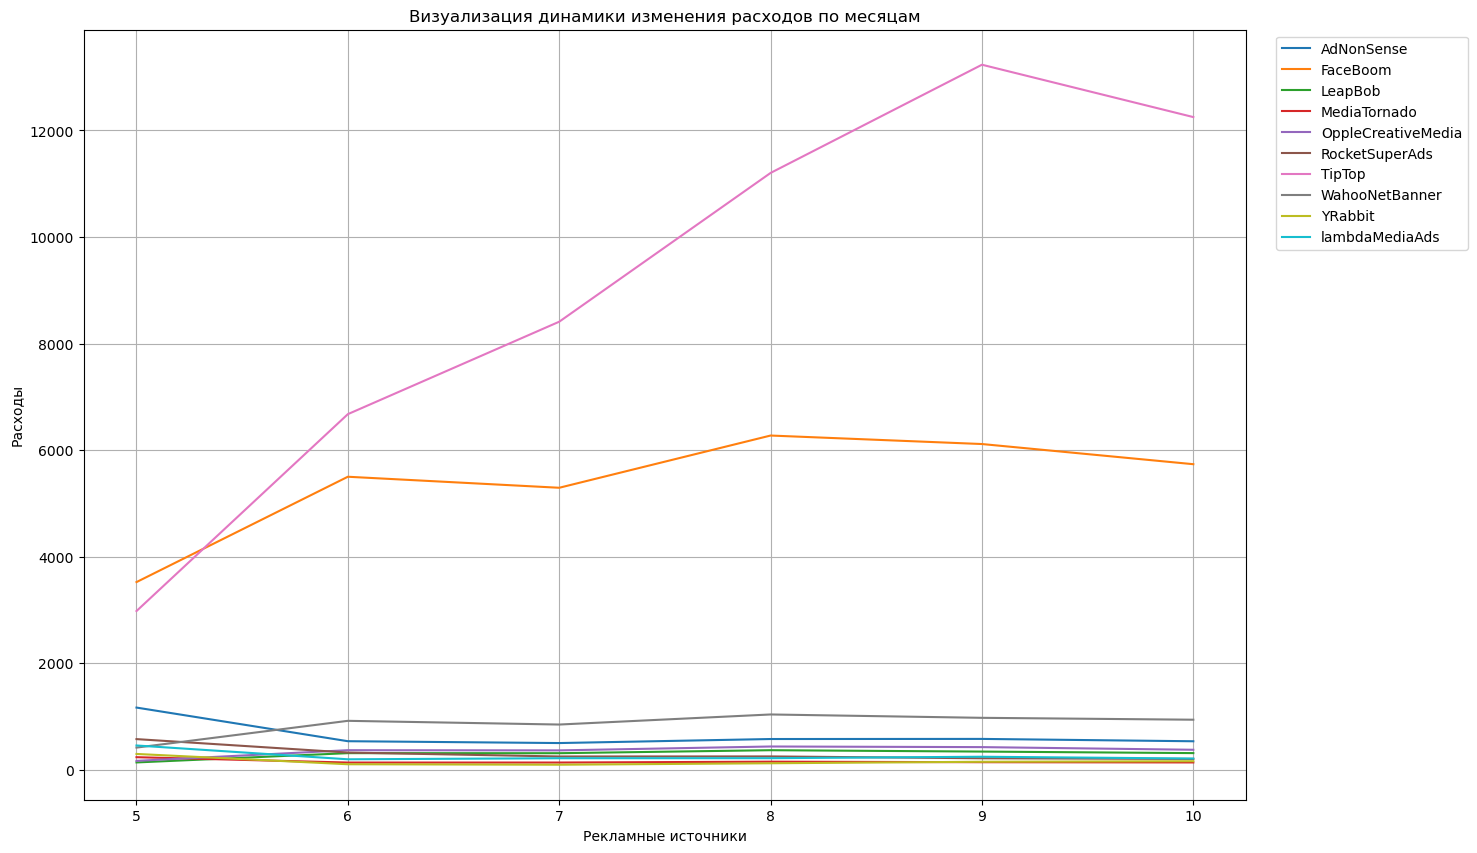

In [142]:
# добавим два новых столбца (неделя, месяц)
costs['week'] = costs['dt'].astype('datetime64[W]').dt.isocalendar().week 
costs['month'] = costs['dt'].astype('datetime64[M]').dt.month
display(costs.sort_values(by='week', ascending=False))
 
 
# визуализация динамики изменения расходов по неделям
costs.pivot_table(
    index='week', 
    columns='channel', 
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)
 
plt.title('Визуализация динамики изменения расходов по неделям')
plt.xlabel('Рекламные источники')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()
 
 
# визуализация динамики изменения расходов по месяцам
costs.pivot_table(
    index='month', 
    columns='channel', 
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)
 
plt.title('Визуализация динамики изменения расходов по месяцам')
plt.xlabel('Рекламные источники')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()


В начале кампании были сделаны стартовые пропорциональные вливания в каждый источник пользователей. Сумма расходов на каналы привлечения FaceBoom и TipTop продолжили расти, тогда как показатели кривых, изображающиз другие источники остались на цифрах до 2 тысяч у.е. Пик расходов на канал TipTop достиг отметки в >13 тыс. у. е. в сентябре. Пик расходов на канал FaceBoom пришелся в августе и достиг чуть больше 6 тысяч у. е.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

In [143]:
cac = (profiles.groupby('channel')
       .agg({'acquisition_cost': 'mean'})
       .rename(columns={'acquisition_cost': 'cac'})
).sort_values(by = 'cac', ascending=False)
cac

cac
channel                   
TipTop             2.79900
FaceBoom           1.11329
AdNonSense         1.00805
lambdaMediaAds     0.72480
WahooNetBanner     0.60224
RocketSuperAds     0.41210
OppleCreativeMedia 0.25000
YRabbit            0.21897
MediaTornado       0.21872
LeapBob            0.21017
organic            0.00000

Самые "дорогие" пользователи получились с TipTop -- 2.8 у.е. за аккаунт. Пользователи с FaceBoom и AdNonSense обошлись компании в 1 у.е. за аккаунт. Пользователи, пришедшие по другим каналам привлечения стоили меньше 1 у.е. вплоть до 0.2 у.е(OppleCreativeMedia, YRabbit, MediaTornado, LeapBob)

### Оценка окупаемость рекламы

#### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [144]:
horizon_days = 14
observation_date = datetime(2019, 11, 1).date()
profiles = profiles.query('channel != "organic"')

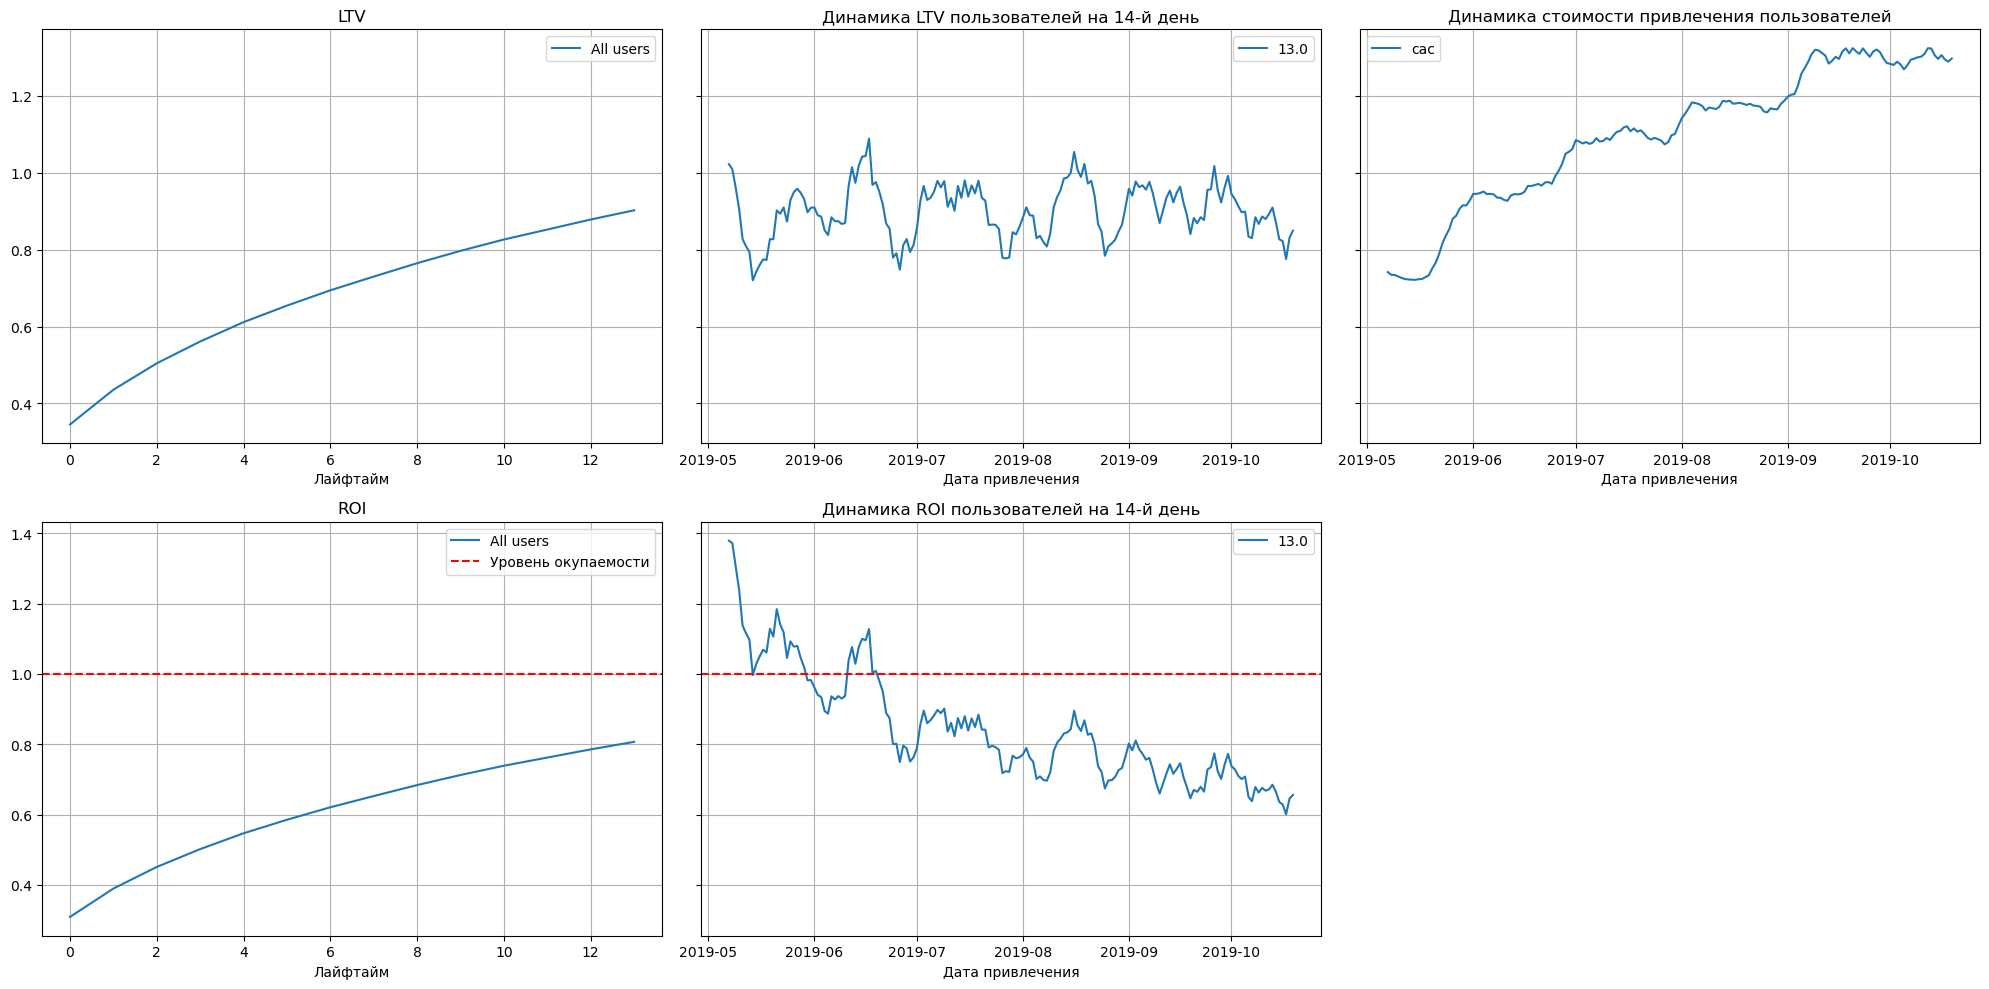

In [145]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

* Реклама не окупается - показатель ROI в конце лайфтайма не доходит до уровня окупаемости
* САС крайне не стабилен и очень сильно растет. Вероятно проблема в увеличении бюджета
* Показатель LTV стабилен, следовательно проблема не в ухудшении качества пользователей
* Динамика ROI на 14ый день плохая. В начале рекламной кампании все было хорошо, потом показатель перешел ниже уровня окупаемости

#### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим графики конверсии и удержания.

In [146]:
dimensions = ['device']

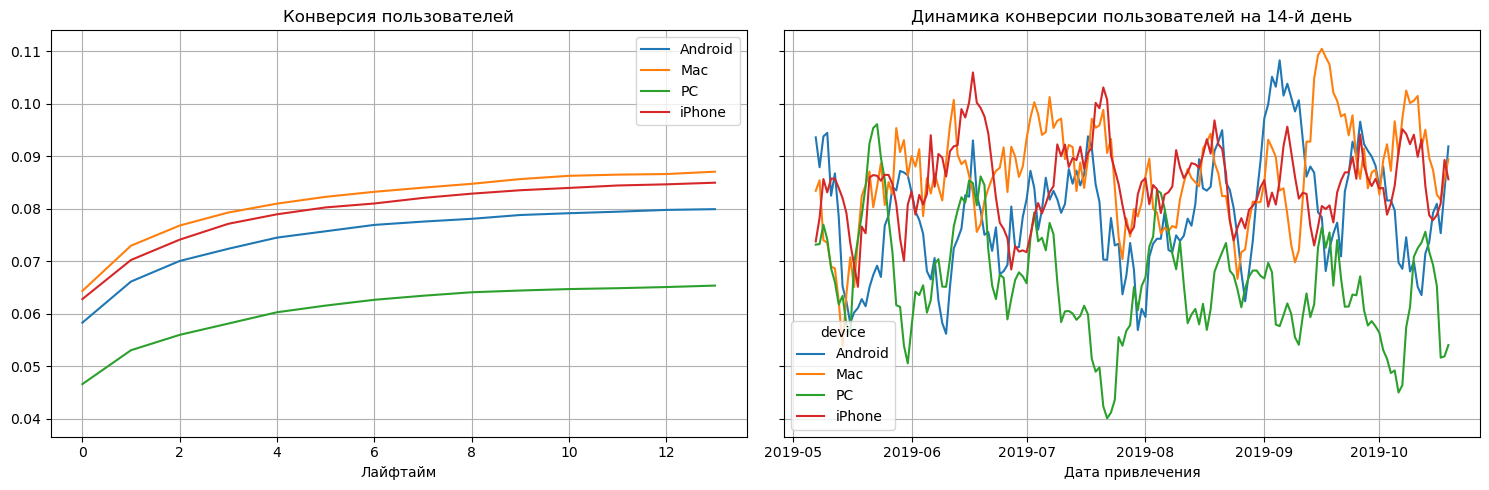

In [147]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Самые неконвертируемые пользователи PC (доля ниже). Все графики имеют одну тенденцию на увеличение с лайфтаймом

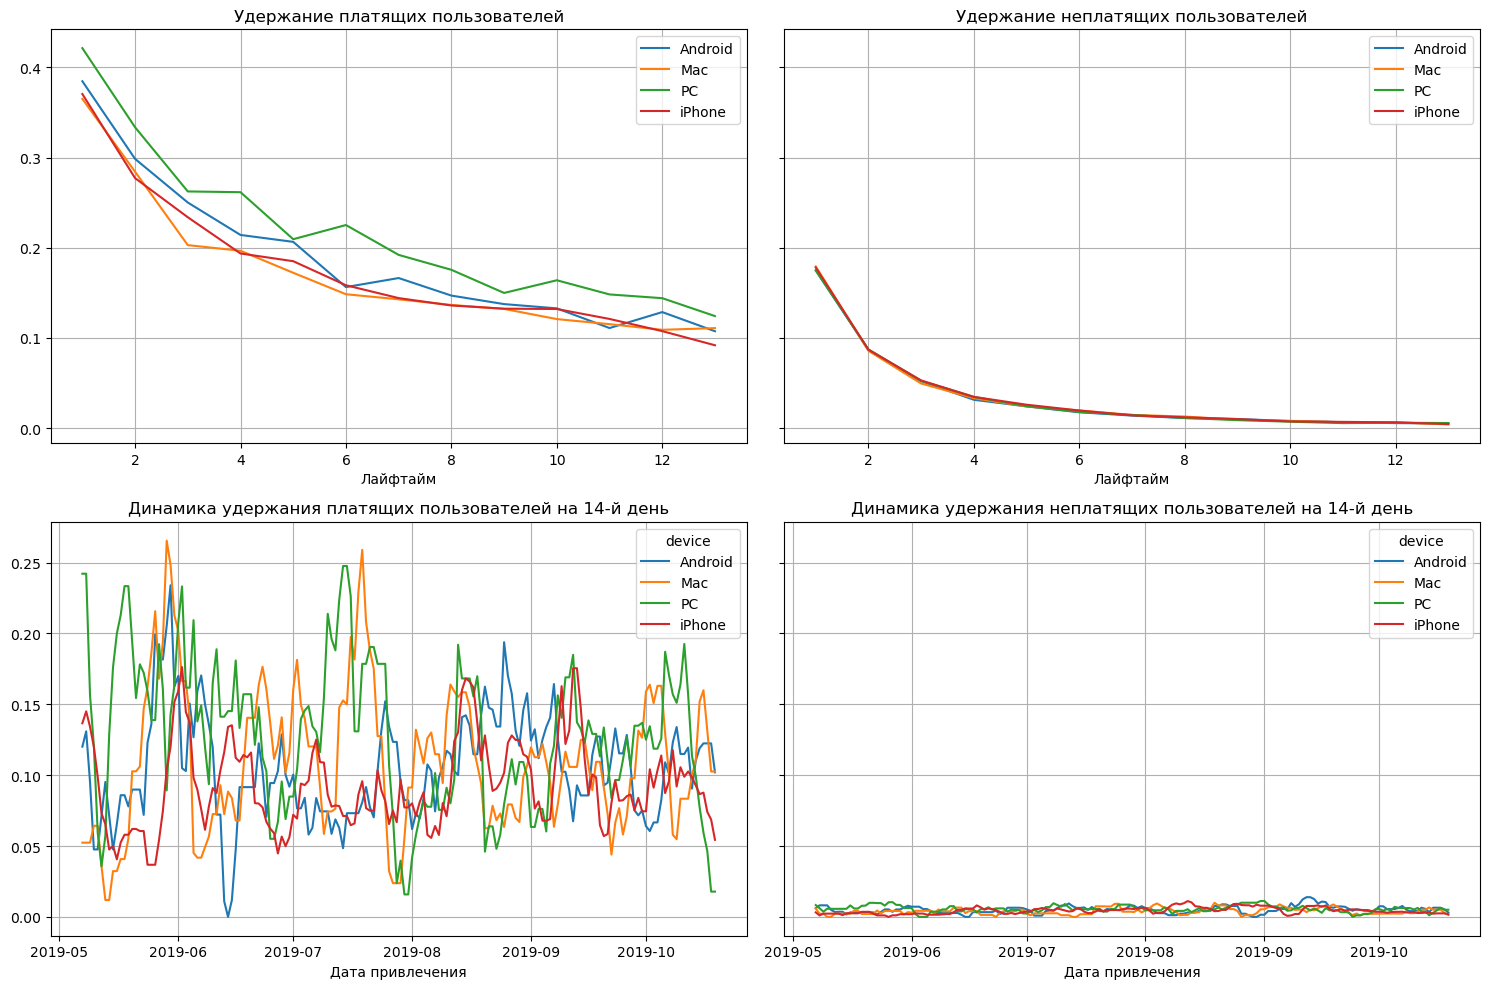

In [148]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Кривые всех групп имеют одну общую тенденцию изменения, следовательно нельзя выделить какое-либо устройство, которое выбивается из общей закономерности

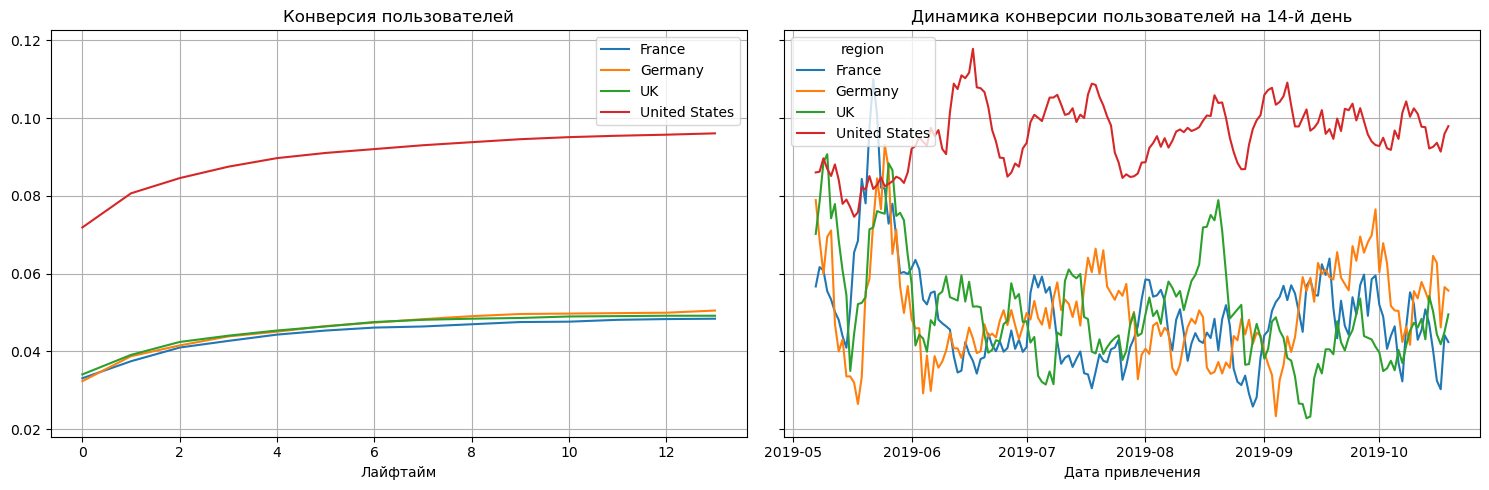

In [149]:
dimensions = ['region']
# конверсия по регионам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

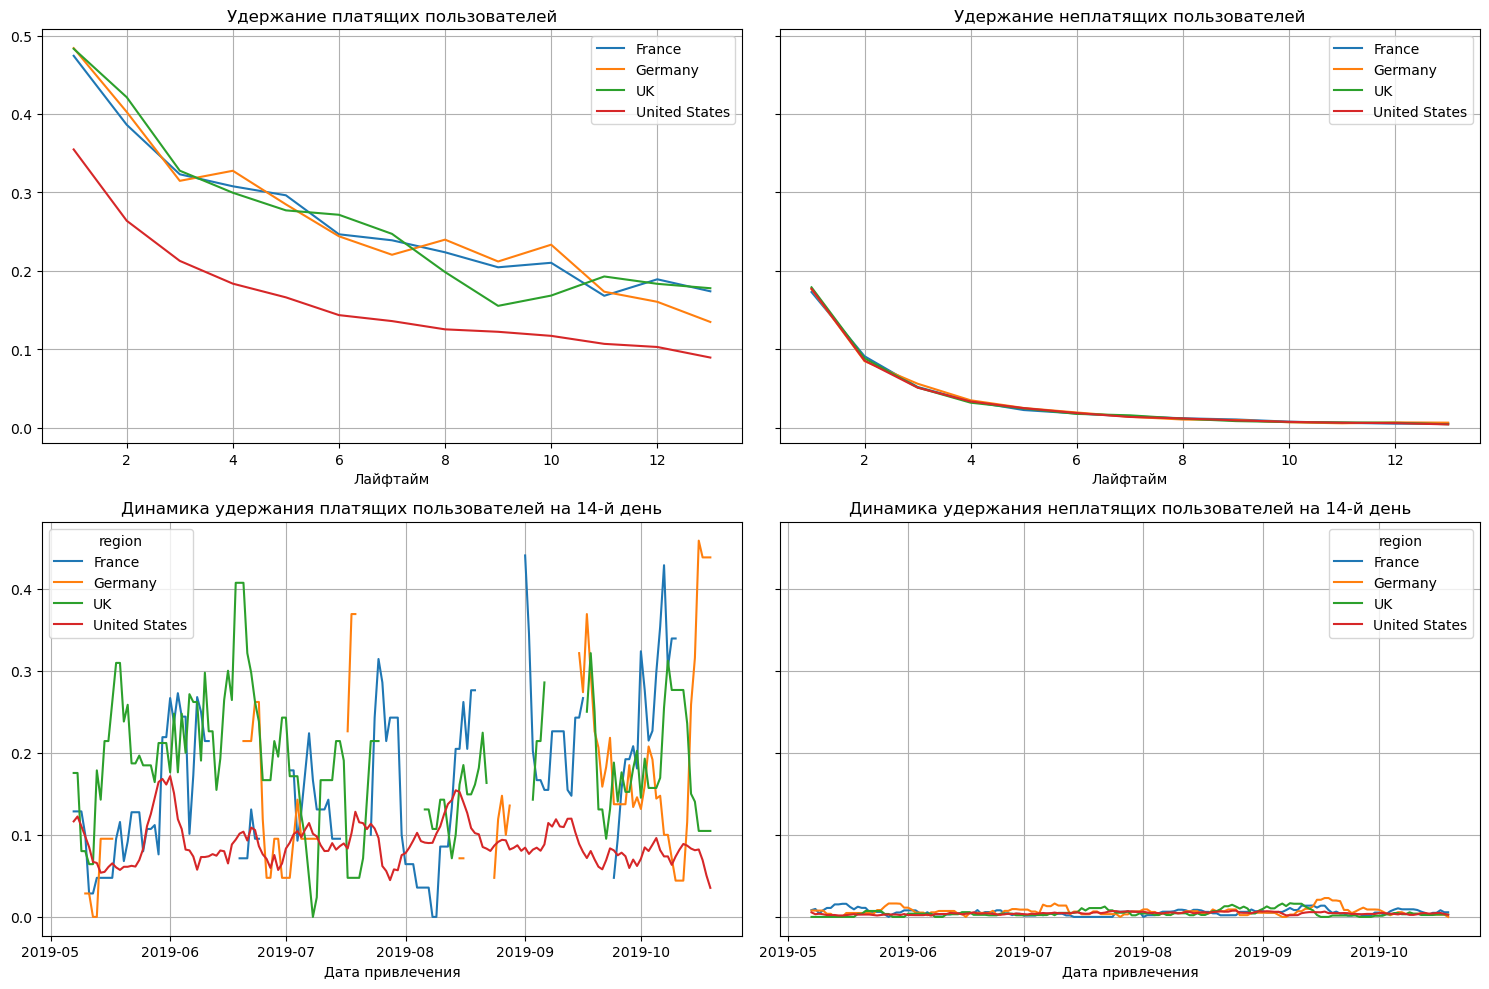

In [150]:
# удержание по регионам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Очень высокая конверсия пользователей из США, и примерно такое же низкое удержание платящих пользователей из этого региона, что может говорить о рекламе среди неплатящих пользователей (потенциально дети, подростки)

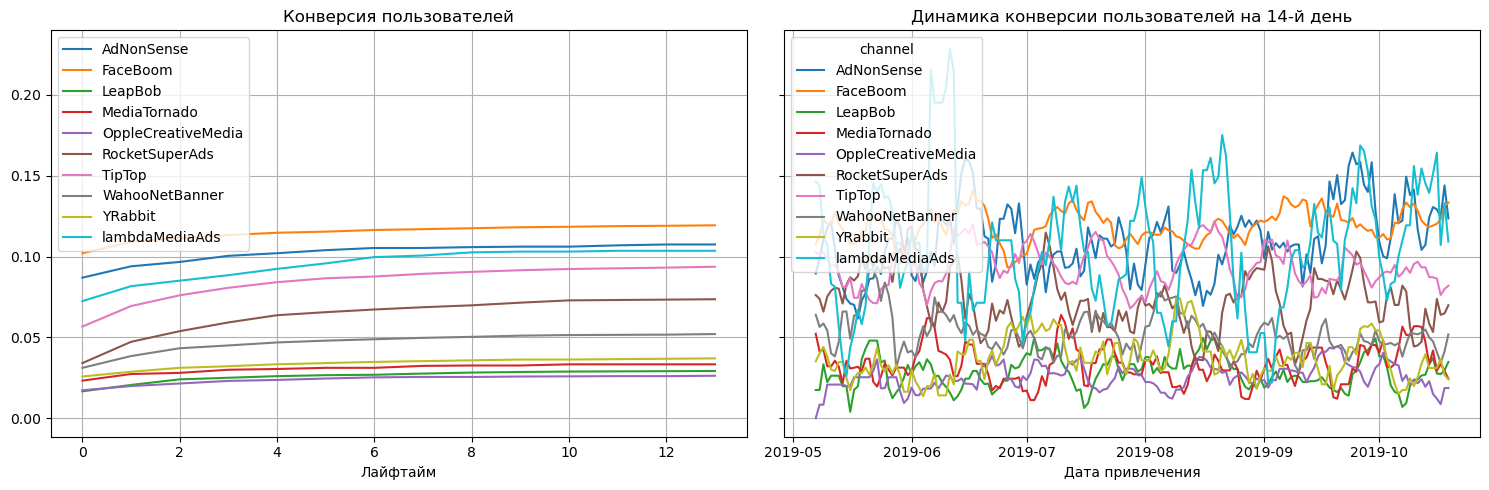

In [151]:
dimensions = ['channel']
# конверсия по каналам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

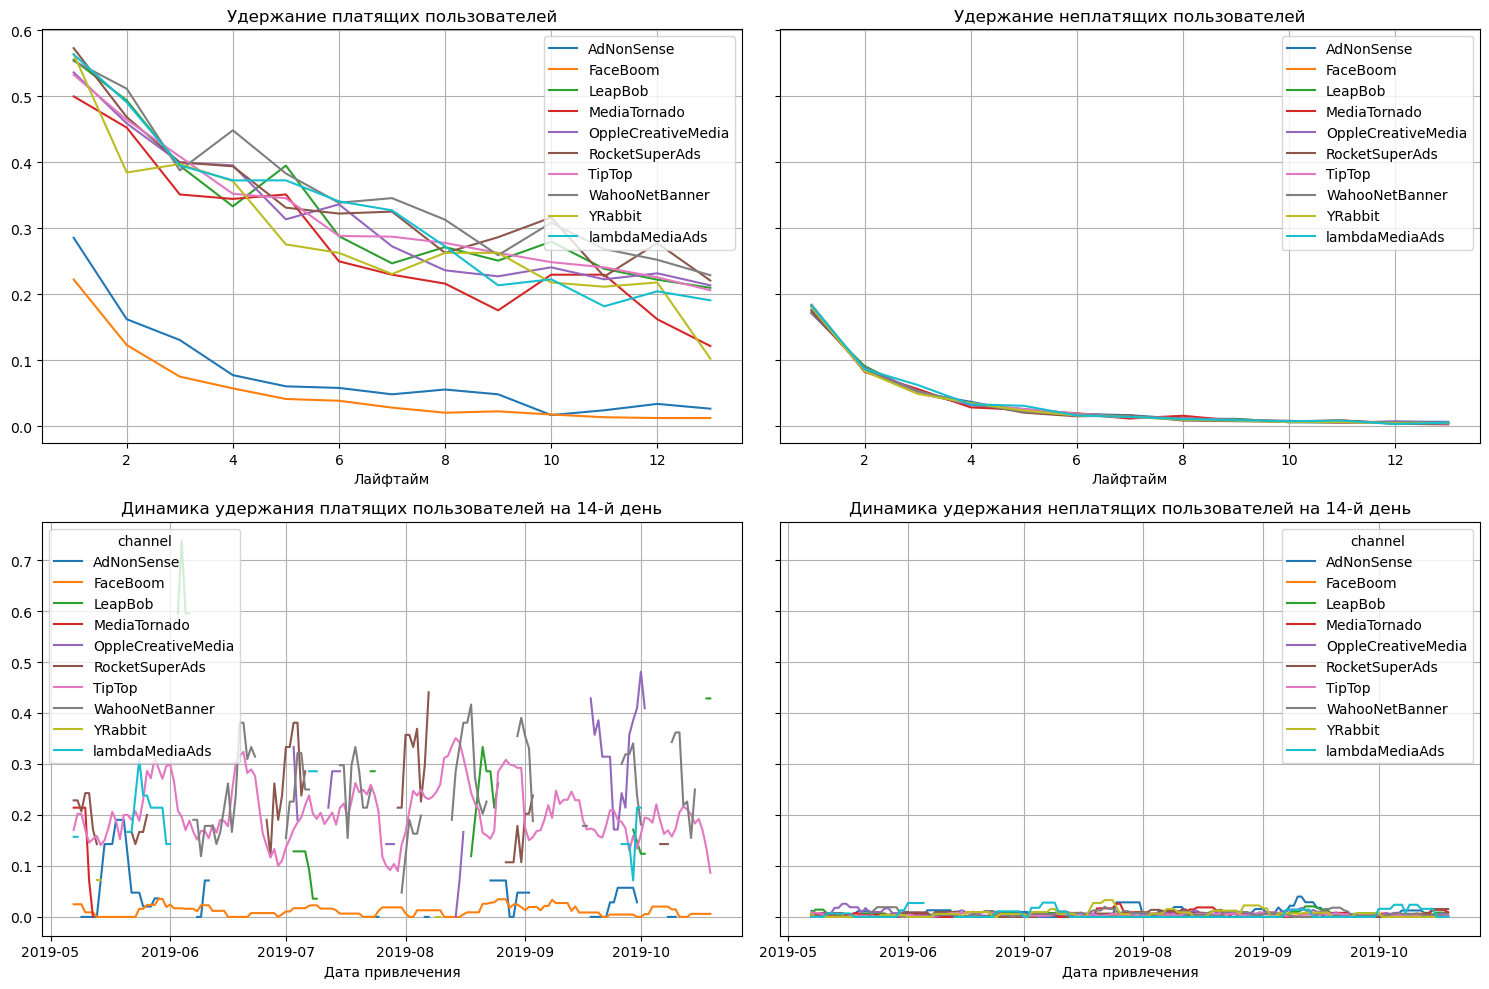

In [152]:
# удержание по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 


Стоит отметить высокую конверсию пользователей в канале FaceBoom, и крайне низкое удержание платящих пользователей с этого канала привлечения. Остальное все закономерно и похоже друг на друга

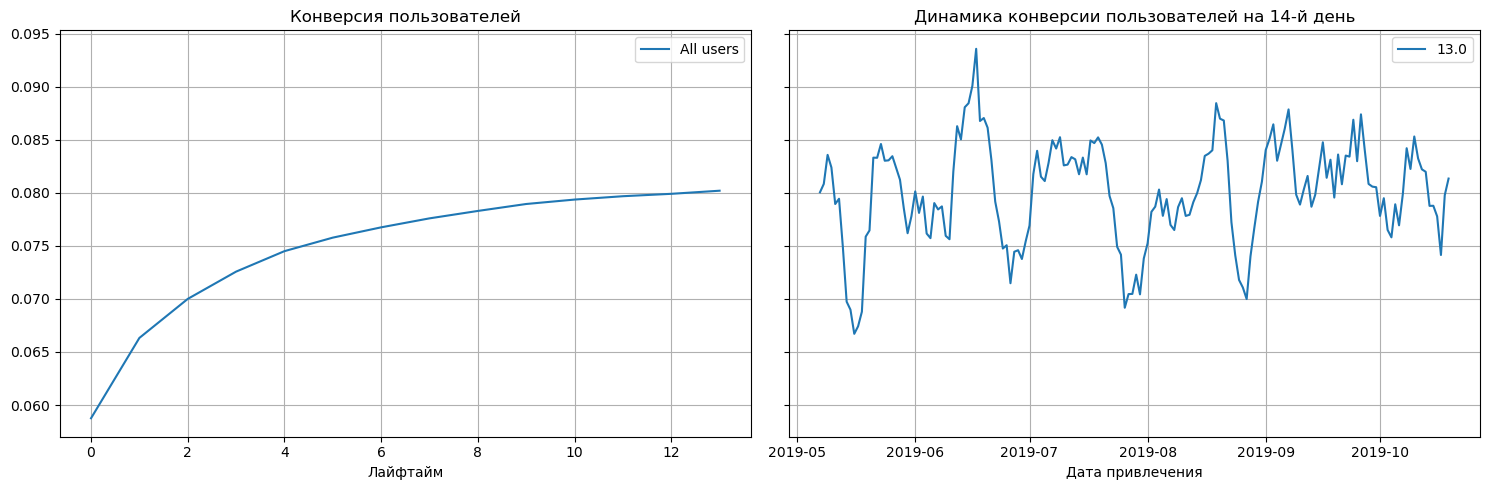

In [153]:
# конверсия в разрезе общих данных

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

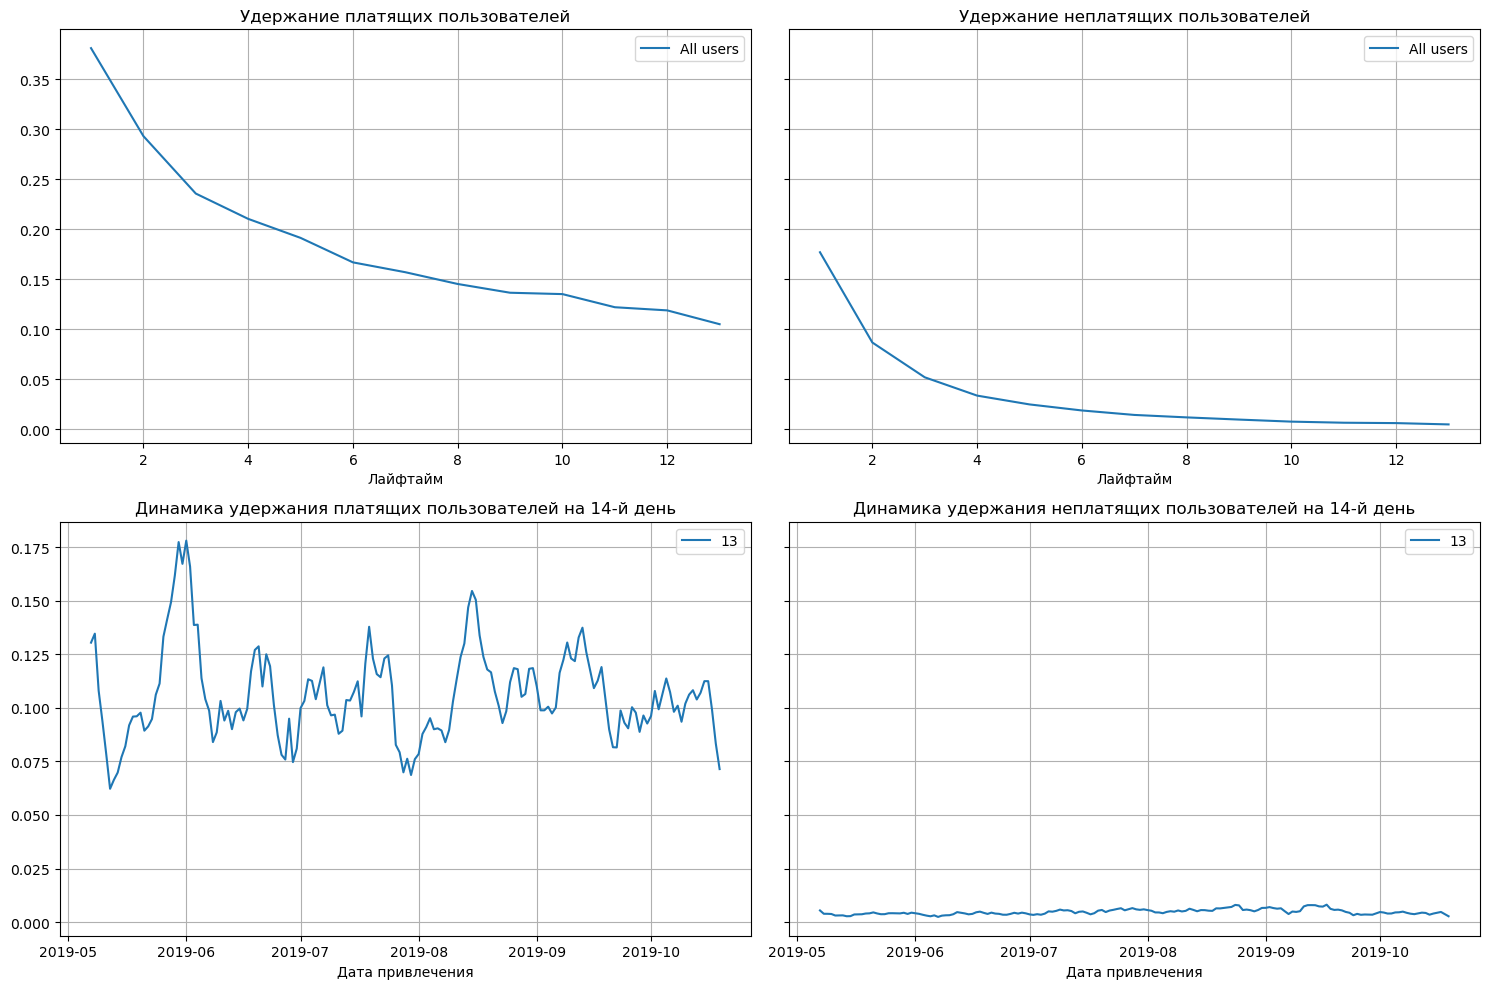

In [154]:
# удержание в разрезе общих данных

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 


В общих данных динамика удержания платящих пользователей неплохая. Динамика удержания неплатящих пользователей стремится к нулю и задерживает клиентов только на первые пару дней. Возможно, приложение построено по принципу подписки или изобилует платным контентом, что пагубно сказывается на удержании пользователей. <br>
Конверсия также для общих данных имеет хорошие показатели(график растущий)

#### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

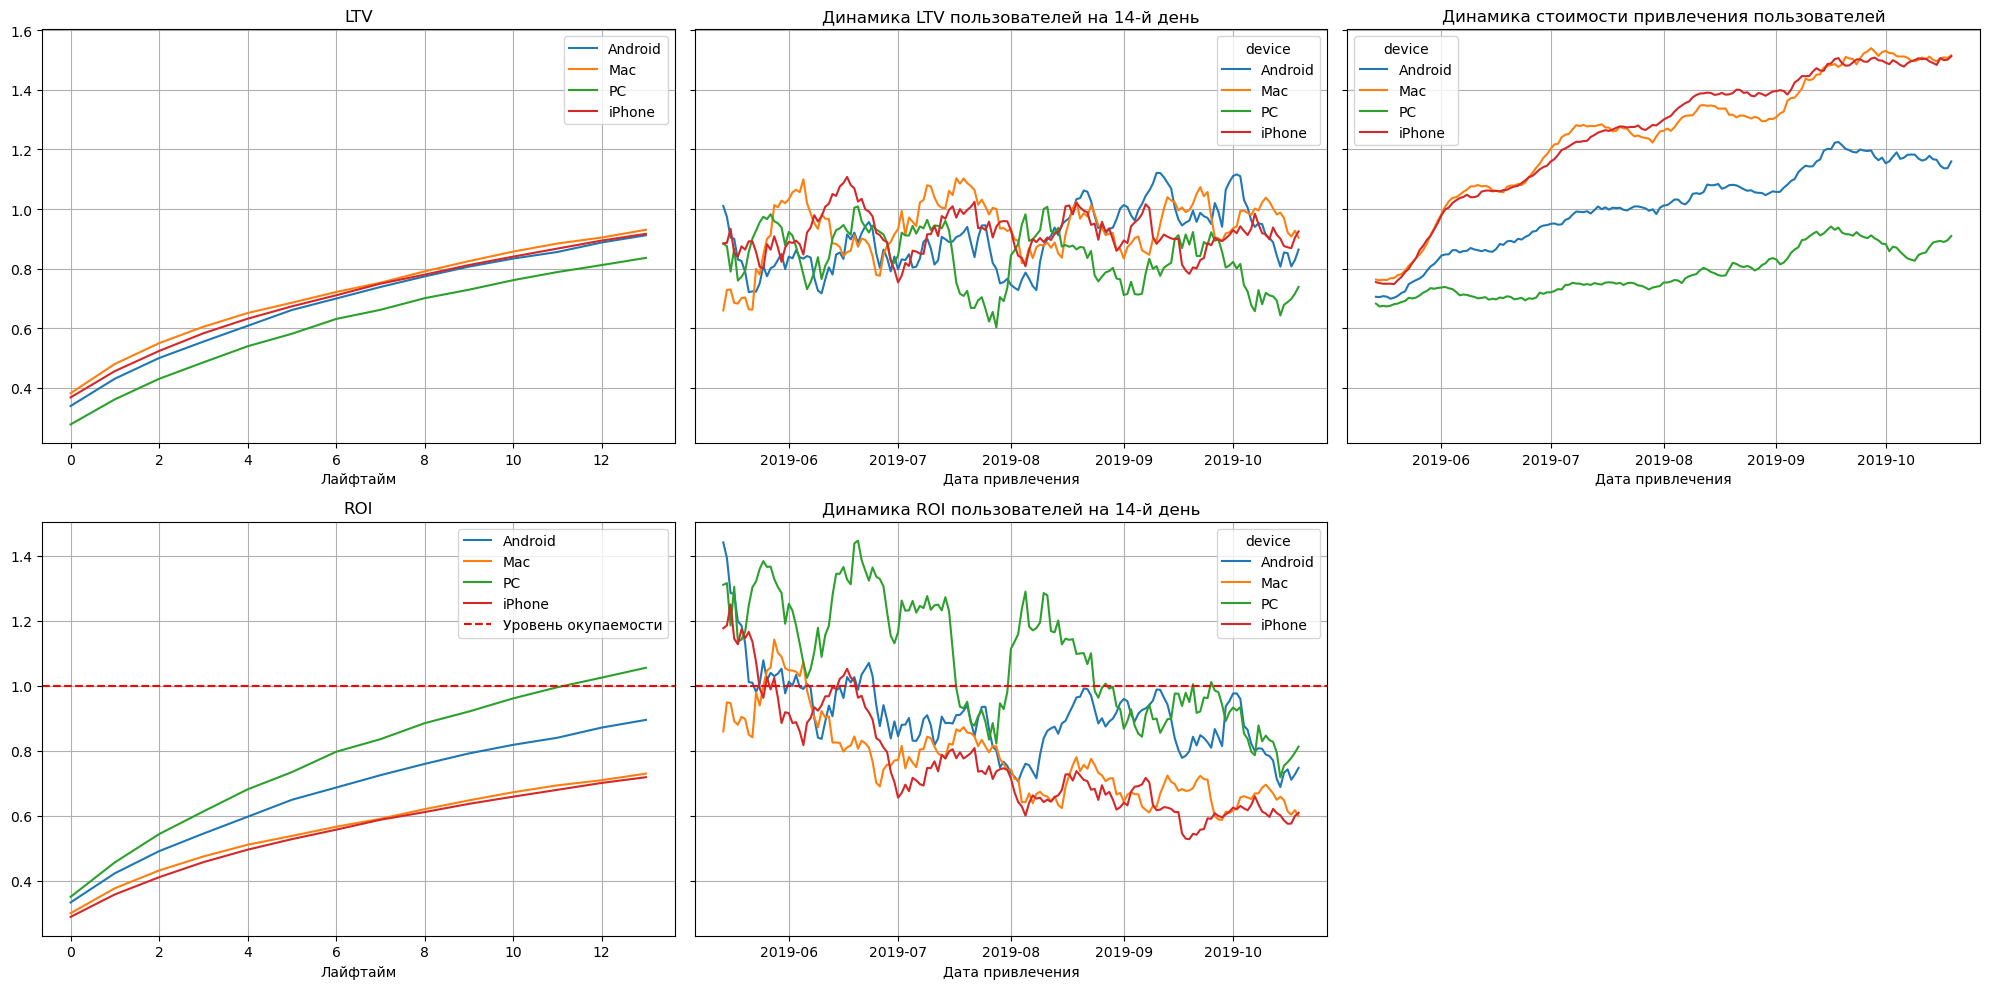

In [155]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Динамика стоимости привлечения пользователей показывает, что устройства Mac и iPhone самые затратные для компании. PC является самым дешевым устройством в этой категории и он же единственный окупается на 14ый день лайфтайма, а также график PC иногда находится выше красной линии на графике динамики ROI пользователей на 14ый день. Стоит отметить, что в первый месяц окупались все устройства, но позже кривые графика имеют тенденцию на понижение и стремятся пересечь линию уровня окупаемости( устройства Apple ее пересекают и больше не поднимаются выше)

#### Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

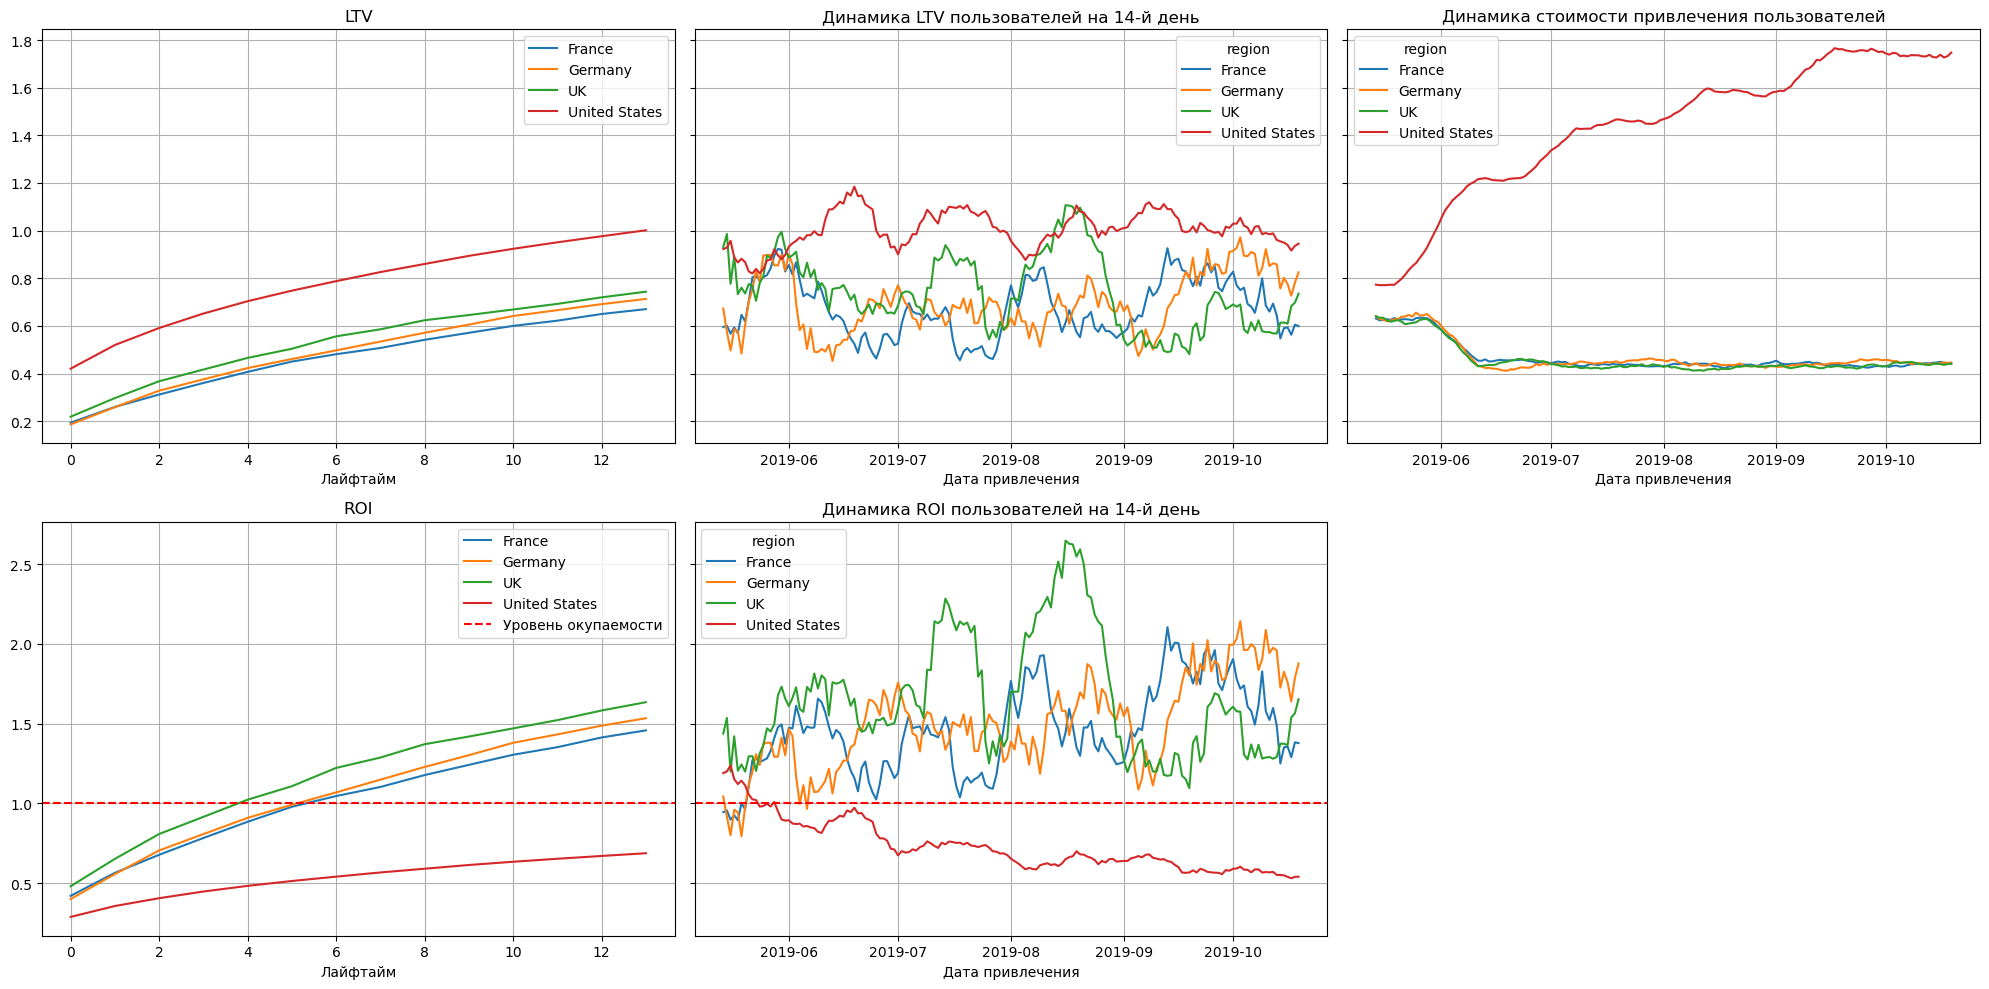

In [156]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пожизненная ценность клиента во всех странах имеет положительную тенденцию, когда как окупаемость разнится. Очень сильно выделяется США в графике стоимости привлечения пользователей. График взлетает наверх и расходы на этот регион только растут. На графиках динамики ROI пользователей в европейском регионе все хорошо, когда США не окупается совсем. Присутствует прямая зависимость между ростом трат на рекламу и падением окупаемости в Северной Америке.

#### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

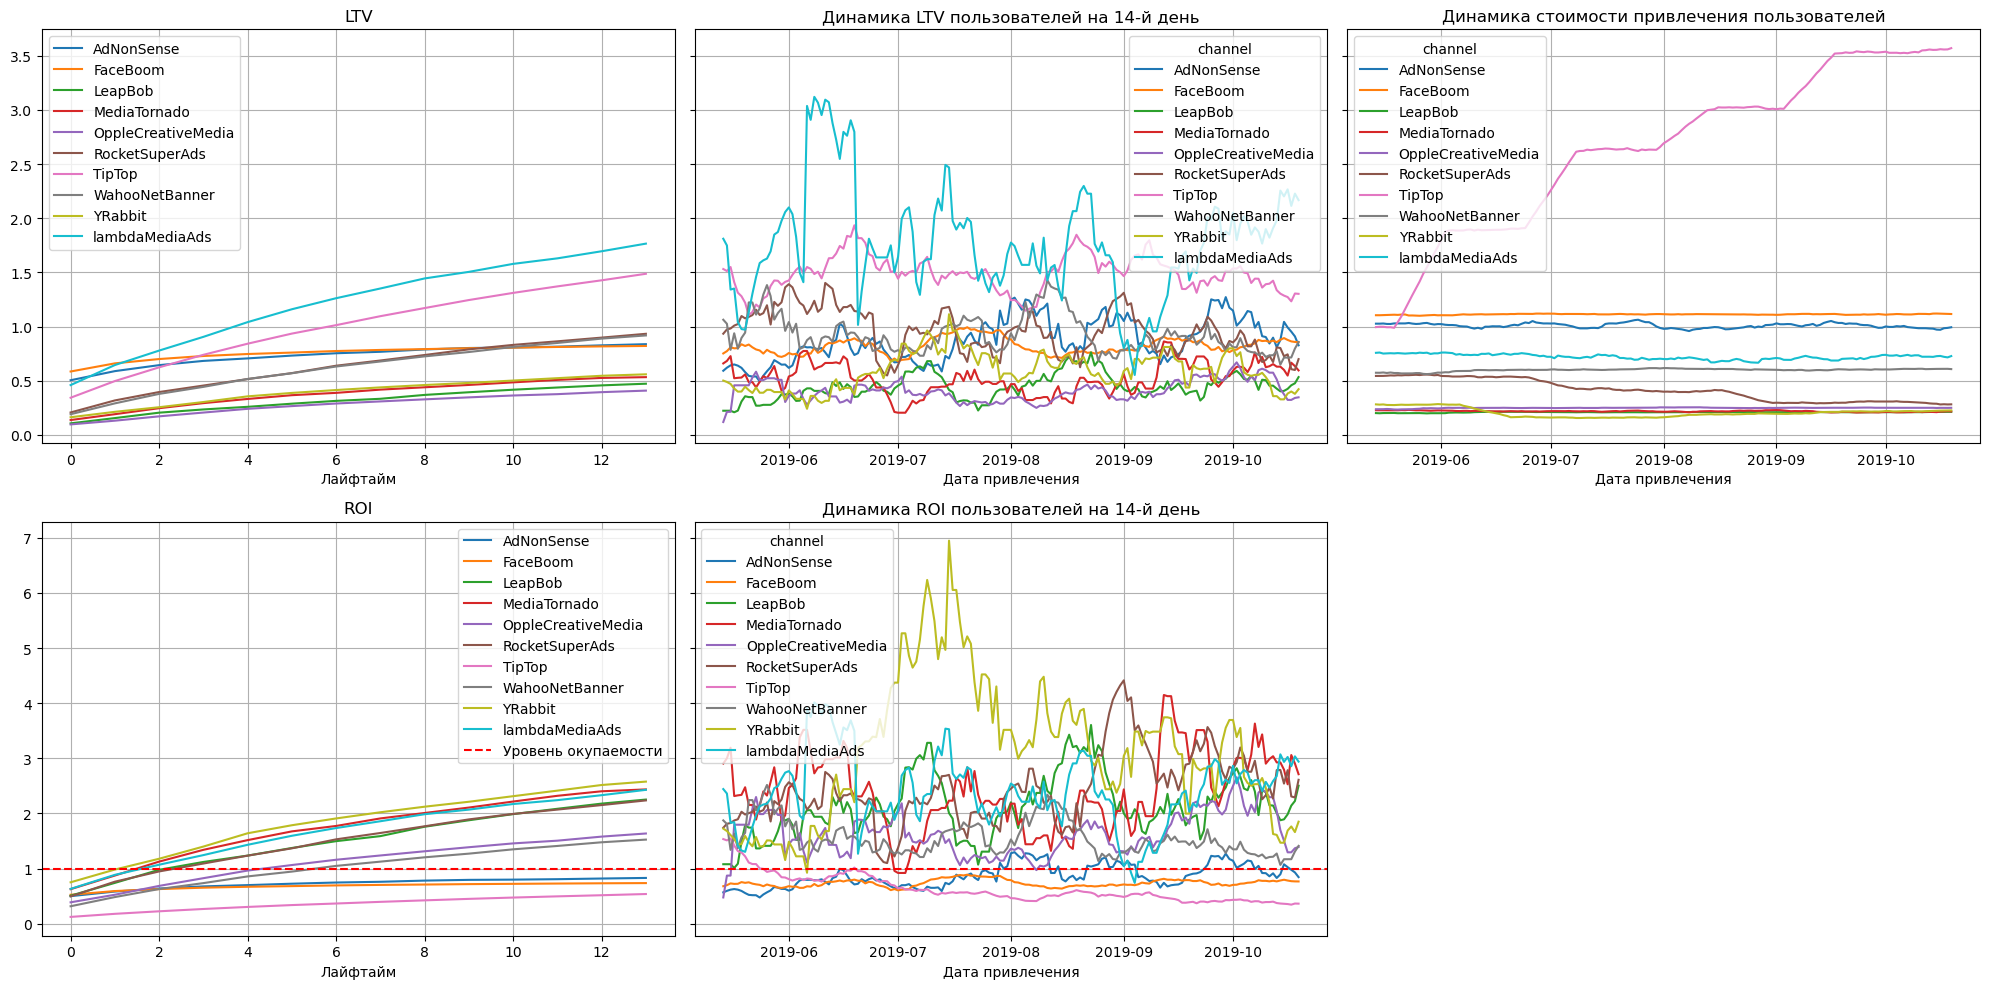

In [158]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

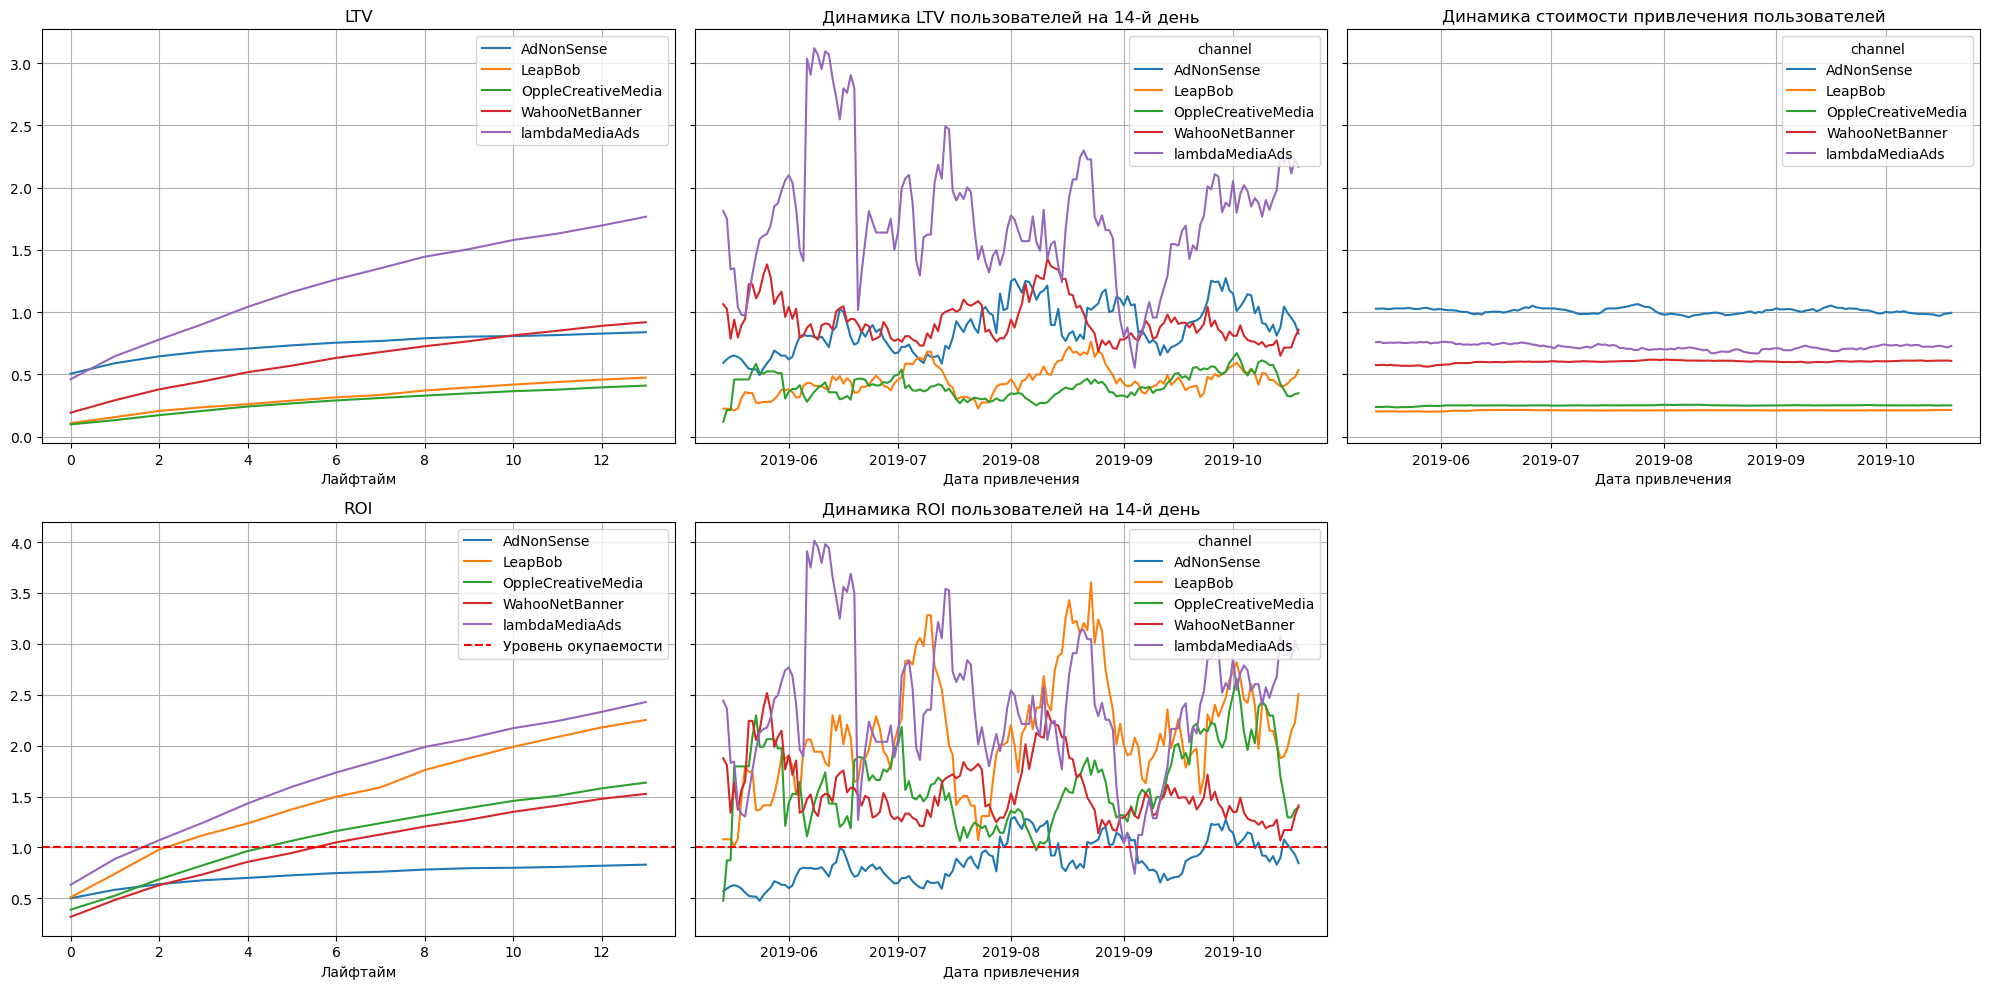

In [161]:
# смотрим окупаемость с разбивкой по каналам для Европейского рынка
j = profiles.query('region != "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    j, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В Европе не окупаются пользователи с канала lambdaMediaAds, а самыми прибыльными являются AdNonSense и LeapBob. Также окупаются WahooNetBanner и OppleCreativeMedia

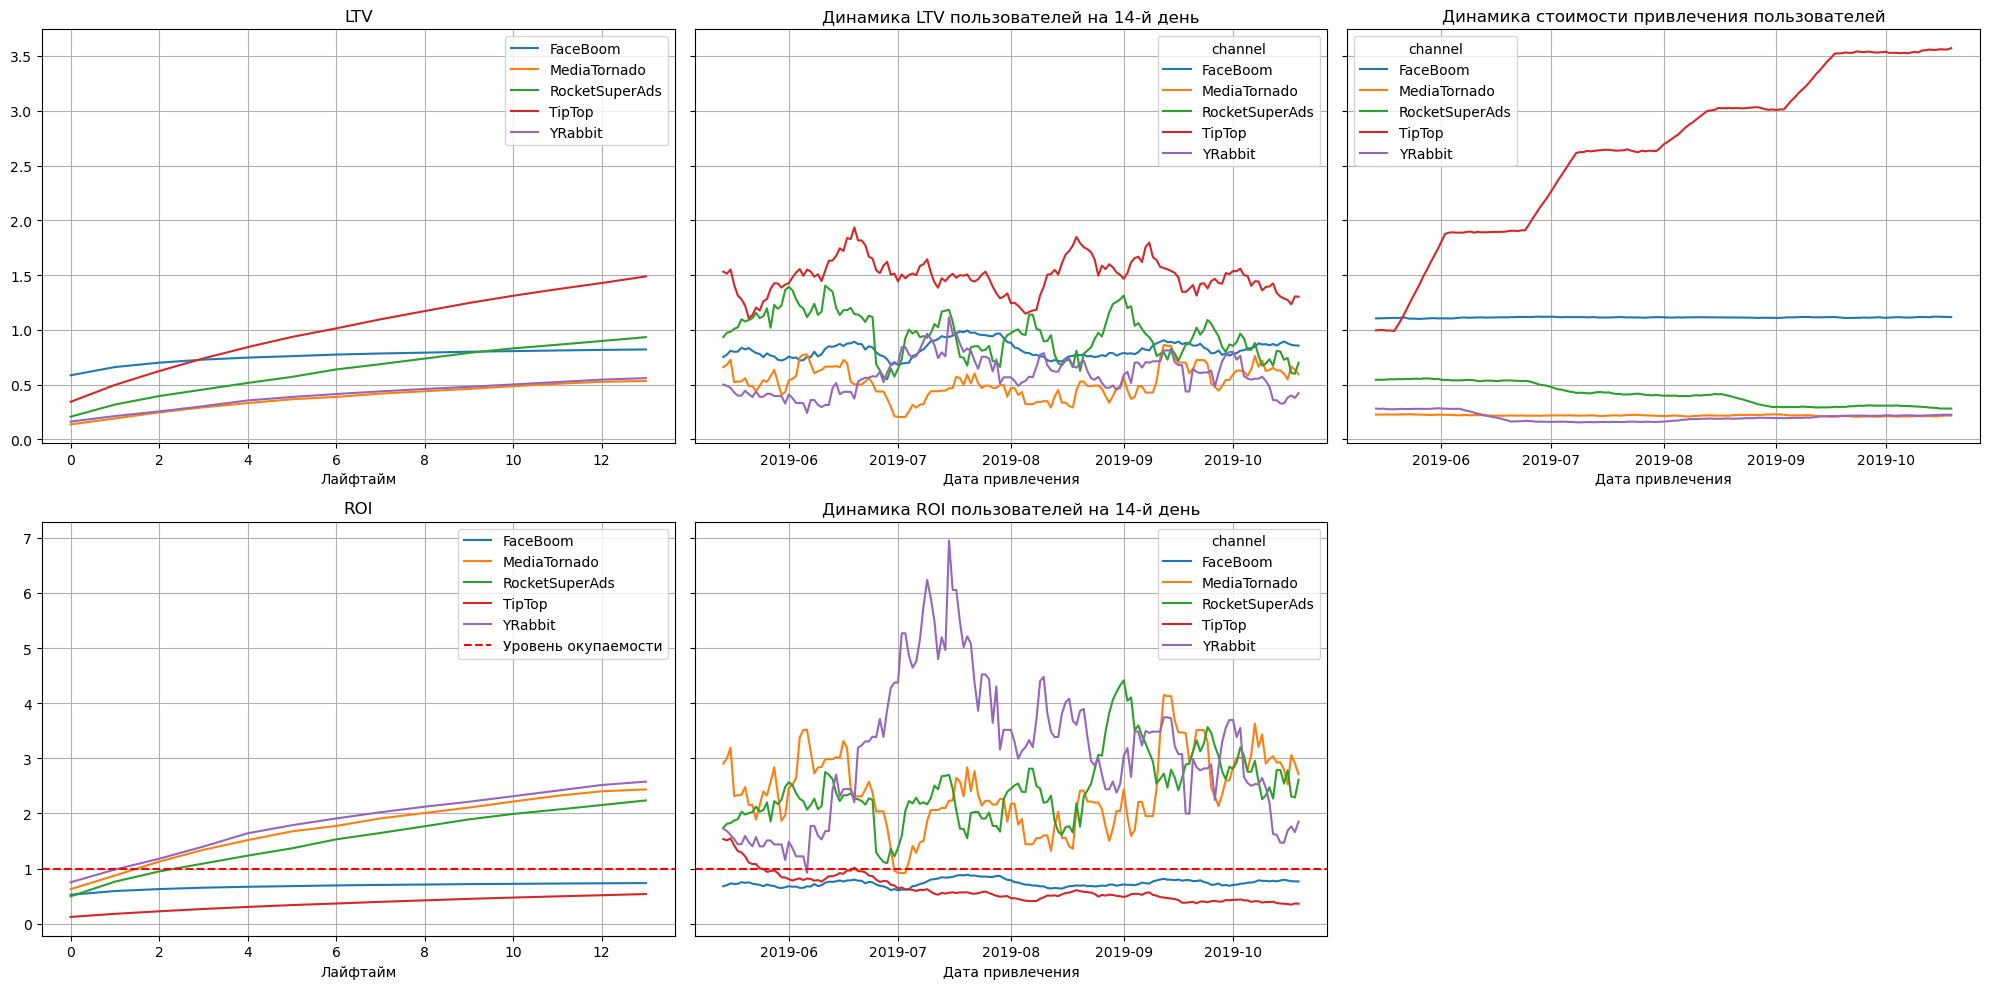

In [163]:
i = profiles.query('region == "United States"')
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    i, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

В США не окупаются каналы TipTop и FaceBoom, когда прибыльными являются RocketSuperAds, MediaTornado и Yrabbit

Каналы TipTop и FaceBoom имеют стабильную отрицательную статистику окупаемости, а также большие затраты на их существование. Источник TipTop имеет тенденцию на сильное увеличение расходов на рекламу и стабильную неокупаемость. 

### Выводы

#### Причины неэффективности привлечения пользователей.
Были выбраны неправильные каналы привлечения пользователей для инвестирования. Ошибочное ощущение того, что каналы с большой аудиторией будут приносить больше прибыль сыграло против выйдя в убытки. <br>
Большая доля пользователей было из США, когда данный регион выяснилось, что не окупился вообще. Вероятно, каналы TipTop и FaceBoom являются популярными именно в этом регионе. <br>
Такеж компанией было принято решение по сильному увеличению расходов на один из источников привлечения пользователей. Пока затраты были на уровне других источников, все пользователи окупались. Как только расходы на рекламу стали расти, пользователи перестали окупаться. <br>
При анализе удержания пользователей было обнаружено, что неплатящие пользователи практически не остаются к 14ому дню. График изменения данного показателя падает вертикально вниз уже ко 2ому дню использования. <br>
Cамыми прибыльными являются AdNonSense и LeapBob и чуть менее прибыльными WahooNetBanner и OppleCreativeMedia. В США прибыльными являются RocketSuperAds, MediaTornado и Yrabbit. 

#### Рекомендации для отдела маркетинга.
Не стоит ориентироваться только на количество приведенных пользователей из крупного источника. Реклама в них стоит очень дорого, а она не окупается. Стоит сосредоточиться на дешевой рекламе в менее крупных источниках, а также не стоит сильно увеличивать затраты в один канал привлечения. <br>
Возможно стоит пересмотреть формат работы с платным контентом, который недоступен для пользователей, не готовых платить в первые дни использования. Также рекомендовано сконцентрировать вложения рекламного бюджета в эти каналы привлечения пользователей, а также пересмотреть политику расходов на оставшиеся каналы
